💡 **Question 1**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

**Example 1:**

Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1
Explanation:The link list looks like
1 -> 3 -> 4
     ^    |
     |____|
A loop is present. If you remove it
successfully, the answer will be 1.

In [1]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def detectAndRemoveLoop(head):
    if not head or not head.next:
        return head

    slow = head
    fast = head

    # Detect the loop using the Floyd's cycle detection algorithm
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            break

    if slow != fast:
        # No loop found, return the original head
        return head

    # Move one pointer to the head and advance both pointers
    # until they meet at the starting point of the loop
    slow = head
    while slow.next != fast.next:
        slow = slow.next
        fast = fast.next

    # Unlink the last node from the loop
    fast.next = None

    return head

head = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node5
node5.next = node2  # Create the loop

# Call the detectAndRemoveLoop function
head = detectAndRemoveLoop(head)


current = head
while current:
    print(current.val, end="->")
    current = current.next

1->2->3->4->5->

💡 **Question 2**

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

**Example 1:**

Input:
LinkedList: 4->5->6
Output:457

In [2]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def reverseLinkedList(head):
    prev = None
    current = head

    while current:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node

    return prev

def addOne(head):
    if not head:
        return ListNode(1)

    # Reverse the linked list
    reversed_head = reverseLinkedList(head)

    # Traverse the reversed linked list and add 1
    current = reversed_head
    carry = 1

    while current:
        current.val += carry
        carry = 0

        if current.val >= 10:
            current.val %= 10
            carry = 1

        if not current.next and carry:
            # Add a new node at the end if there is a carry
            current.next = ListNode(1)

        current = current.next

    # Reverse the linked list again to restore the original order
    return reverseLinkedList(reversed_head)

head = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)

head.next = node2
node2.next = node3

# Call the addOne function
head = addOne(head)


current = head
while current:
    print(current.val, end="->")
    current = current.next

1->2->4->

💡 **Question 3**

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

**Example 1:**

Input:
5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45
Output: 5-> 7-> 8- > 10 -> 19-> 20->
22-> 28-> 30-> 35-> 40-> 45-> 50.
Explanation:
The resultant linked lists has every
node in a single level.(Note:| represents the bottom pointer.)

In [3]:
class ListNode:
    def __init__(self, val=0, next=None, bottom=None):
        self.val = val
        self.next = next
        self.bottom = bottom

def mergeLists(list1, list2):
    if not list1:
        return list2
    if not list2:
        return list1

    merged = None

    if list1.val < list2.val:
        merged = list1
        merged.bottom = mergeLists(list1.bottom, list2)
    else:
        merged = list2
        merged.bottom = mergeLists(list1, list2.bottom)

    merged.next = None
    return merged

def flattenLinkedList(head):
    if not head or not head.next:
        return head

    head.next = flattenLinkedList(head.next)

    head = mergeLists(head, head.next)

    return head

head = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)
node6 = ListNode(6)
node7 = ListNode(7)
node8 = ListNode(8)
node9 = ListNode(9)
node10 = ListNode(10)
node11 = ListNode(11)
node12 = ListNode(12)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

node6.next = node7
node7.next = node8

node9.next = node10

node2.bottom = node6
node3.bottom = node8
node4.bottom = node9

node6.bottom = node11
node9.bottom = node12

# Call the flattenLinkedList function
head = flattenLinkedList(head)

# Print the resulting flattened linked list
current = head
while current:
    print(current.val, end="->")
    current = current.bottom

1->2->3->4->5->6->8->9->11->12->

💡 **Question 4**

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.

**Example 1:**
    
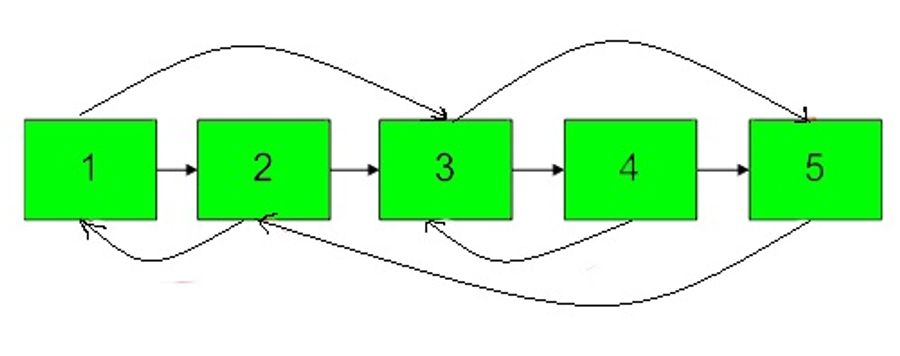
    
Input:
N = 4, M = 2
value = {1,2,3,4}
pairs = {{1,2},{2,4}}
Output:1
Explanation:In this test case, there
are 4 nodes in linked list.  Among these
4 nodes,  2 nodes have arbitrary pointer
set, rest two nodes have arbitrary pointer
as NULL. Second line tells us the value
of four nodes. The third line gives the
information about arbitrary pointers.
The first node arbitrary pointer is set to
node 2.  The second node arbitrary pointer
is set to node 4.

In [4]:
class Node:
    def __init__(self, val=0, next=None, random=None):
        self.val = val
        self.next = next
        self.random = random

def copyRandomList(head):
    if not head:
        return None

    # Create a mapping between original and copied nodes
    mapping = {}

    # First pass: create new nodes with next pointers
    current = head
    while current:
        mapping[current] = Node(current.val)
        current = current.next

    # Second pass: set random pointers
    current = head
    while current:
        copied_node = mapping[current]
        copied_node.next = mapping.get(current.next)
        copied_node.random = mapping.get(current.random)
        current = current.next

    # Return the head of the copied linked list
    return mapping[head]

# Create the input linked list with random pointers
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

node1.next = node2
node2.next = node3
node3.next = node4

node1.random = node3
node2.random = node1
node3.random = node2
node4.random = node4

# Call the copyRandomList function
copied_head = copyRandomList(node1)

# Print the copied linked list with random pointers
current = copied_head
while current:
    print(f"Node value: {current.val}")
    if current.random:
        print(f"Random pointer points to: {current.random.val}")
    else:
        print("Random pointer is None")
    print()
    current = current.next

Node value: 1
Random pointer points to: 3

Node value: 2
Random pointer points to: 1

Node value: 3
Random pointer points to: 2

Node value: 4
Random pointer points to: 4



💡 **Question 5**

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.

**Example 1:**

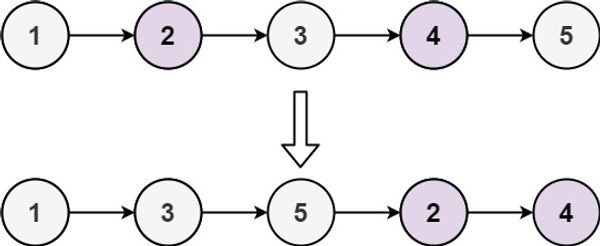    
    
Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]

In [5]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def oddEvenList(head):
    if not head or not head.next:
        return head

    odd_head = head
    even_head = head.next
    odd_tail = odd_head
    even_tail = even_head

    current = even_head.next
    index = 3

    while current:
        if index % 2 == 1:
            odd_tail.next = current
            odd_tail = odd_tail.next
        else:
            even_tail.next = current
            even_tail = even_tail.next
        current = current.next
        index += 1

    odd_tail.next = even_head
    even_tail.next = None

    return odd_head

# Create the input linked list
head = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

# Call the oddEvenList function
reordered_head = oddEvenList(head)

# Print the reordered linked list
current = reordered_head
while current:
    print(current.val, end=" -> ")
    current = current.next

1 -> 3 -> 5 -> 2 -> 4 -> 

💡 **Question 6**

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

**Example 1:**

    
Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7
Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

In [6]:
class ListNode:
    def __init__(self, value):
        self.val = value
        self.next = None

def left_shift_linked_list(head, k):
    if not head or k == 0:
        return head

    # Calculate the length of the linked list
    length = 0
    curr = head
    while curr:
        length += 1
        curr = curr.next

    if k >= length:
        return head

    # Find the (k+1)-th node from the beginning
    curr = head
    for _ in range(k):
        curr = curr.next

    new_head = curr.next
    curr.next = None

    # Traverse to the end of the list
    tail = new_head
    while tail.next:
        tail = tail.next

    # Make the last node point to the original head
    tail.next = head

    return new_head
# Create the linked list
values = [2, 4, 7, 8, 9]
head = ListNode(values[0])
curr = head
for value in values[1:]:
    curr.next = ListNode(value)
    curr = curr.next

# Perform left shift with k = 3
k = 3
shifted_head = left_shift_linked_list(head, k)

# Print the resulting linked list
result = []
curr = shifted_head
while curr:
    result.append(str(curr.val))
    curr = curr.next

print(' '.join(result))


9 2 4 7 8


💡 **Question 7**

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

**Example 1:**

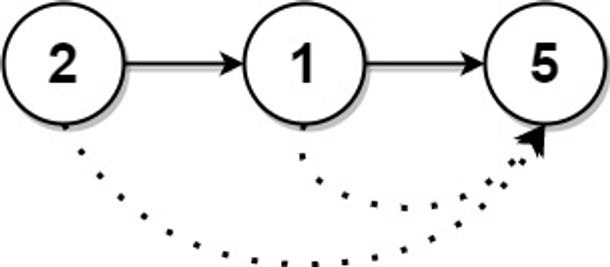    
    
Input: head = [2,1,5]
Output: [5,5,0]

In [7]:
class ListNode:
    def __init__(self, value):
        self.val = value
        self.next = None

def nextGreaterNodes(head):
    # Convert linked list to array
    arr = []
    curr = head
    while curr:
        arr.append(curr.val)
        curr = curr.next

    n = len(arr)
    stack = []
    answer = [0] * n

    for i in range(n - 1, -1, -1):
        while stack and stack[-1] <= arr[i]:
            stack.pop()

        if stack:
            answer[i] = stack[-1]

        stack.append(arr[i])

    return answer

# Create the linked list
values = [2, 1, 5]
head = ListNode(values[0])
curr = head
for value in values[1:]:
    curr.next = ListNode(value)
    curr = curr.next

# Call the function to find the next greater nodes
result = nextGreaterNodes(head)

print(result)

[5, 5, 0]


💡 **Question 8**

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

**Example 1:**

Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

In [8]:
class ListNode:
    def __init__(self, value):
        self.val = value
        self.next = None

def removeZeroSumSublists(head):
    dummy = ListNode(0)
    dummy.next = head
    stack = []
    running_sum = 0
    curr = dummy.next

    while curr:
        running_sum += curr.val

        if running_sum == 0:
            # Remove all nodes in the stack
            while stack:
                node = stack.pop()
                running_sum -= node.val
            dummy.next = curr.next
        else:
            stack.append(curr)

        curr = curr.next


# Create the linked list
values = [1, 2, -3, 3, 1]
head = ListNode(values[0])
curr = head
for value in values[1:]:
    curr.next = ListNode(value)
    curr = curr.next

# Call the function to remove zero-sum subsequences
new_head = removeZeroSumSublists(head)

# Print the resulting linked list
result = []
curr = new_head
while curr:
    result.append(str(curr.val))
    curr = curr.next

print(' '.join(result))